In [32]:
%matplotlib inline


# Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.


In [33]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

## Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.

Note: if we were working from image files (e.g., 'png' files), we would load
them using :func:`matplotlib.pyplot.imread`.



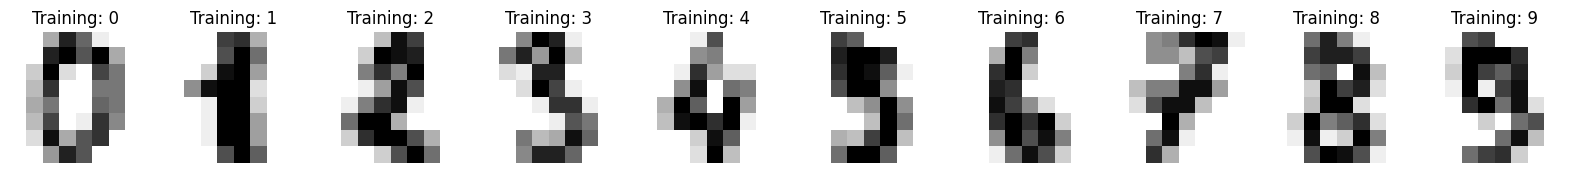

In [34]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [35]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.115, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)


Below we visualize the first 4 test samples and show their predicted
digit value in the title.



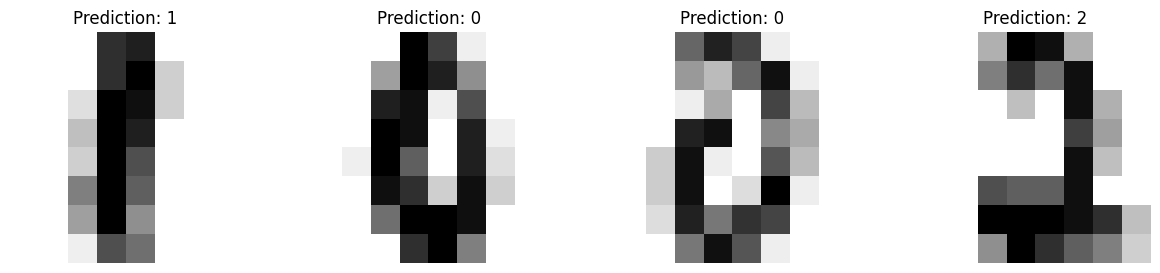

In [36]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [37]:
conf = {}
for j,k in zip(predicted,y_test):
    if f"{j}-{k}" in conf.keys():
        conf[f"{j}-{k}"] += 1
    else:
        conf[f"{j}-{k}"] = 1
#print(confusion_data)
mat_1 = []
for j in range(10):
    mat_2 = []
    for k in range(10):
        if f'{j}-{k}' in conf:
            mat_2 += [conf[f'{j}-{k}']]
        else:
            mat_2 += [0]
    mat_1 += [mat_2]
conf_mat = np.array(mat_1)
print(f"Confusion Matrix")
print(conf_mat)

Confusion Matrix
[[20  0  0  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  0  1]
 [ 0  0  0  0 19  0  0  0  0  0]
 [ 0  0  0  2  0 19  0  0  0  1]
 [ 0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0]
 [ 0  0  0  3  2  0  0  0 18  0]
 [ 0  0  0  0  1  0  0  0  0 18]]


If the results from evaluating a classifier are stored in the form of a
`confusion matrix <confusion_matrix>` and not in terms of `y_true` and
`y_pred`, one can still build a :func:`~sklearn.metrics.classification_report`
as follows:



In [38]:
def plotting(positive,matrix):

    TP = 0
    TN = 0
    FP = 0
    FN = 0
    shape = np.shape(np.array(matrix))
    for i in range(shape[0]):
        for j in range(shape[1]):
            if i == positive and j == positive:
                TP = matrix[i][j]
            if i == positive and j != i:
                FP += matrix[i][j]
    Precision = TP/(TP+FP)

    for i in range(shape[0]):
        for j in range(shape[1]):
            if j == positive and j != i:
                FN += matrix[i][j]
    Recall = TP/(TP+FN)
    
    Accuracy = sum([matrix[i][i] for i in range(shape[0])])
    Accuracy = Accuracy/np.sum(matrix.flatten())

    print(f"Positive : {positive}")
    print(f"Precision is {Precision}")
    print(f"Recall is {Recall}")
    print(f"F1 Score is {2*(Precision*Recall)/(Precision+Recall)}\n")
    return Accuracy
    
    
for k in range(10):        
    Accuracy = plotting(k,conf_mat)
print(f"Accuracy is {Accuracy}\n")


Positive : 0
Precision is 1.0
Recall is 1.0
F1 Score is 1.0

Positive : 1
Precision is 1.0
Recall is 1.0
F1 Score is 1.0

Positive : 2
Precision is 1.0
Recall is 1.0
F1 Score is 1.0

Positive : 3
Precision is 0.9444444444444444
Recall is 0.7727272727272727
F1 Score is 0.85

Positive : 4
Precision is 1.0
Recall is 0.8636363636363636
F1 Score is 0.9268292682926829

Positive : 5
Precision is 0.8636363636363636
Recall is 1.0
F1 Score is 0.9268292682926829

Positive : 6
Precision is 1.0
Recall is 1.0
F1 Score is 1.0

Positive : 7
Precision is 1.0
Recall is 1.0
F1 Score is 1.0

Positive : 8
Precision is 0.782608695652174
Recall is 1.0
F1 Score is 0.878048780487805

Positive : 9
Precision is 0.9473684210526315
Recall is 0.9
F1 Score is 0.9230769230769231

Accuracy is 0.9516908212560387



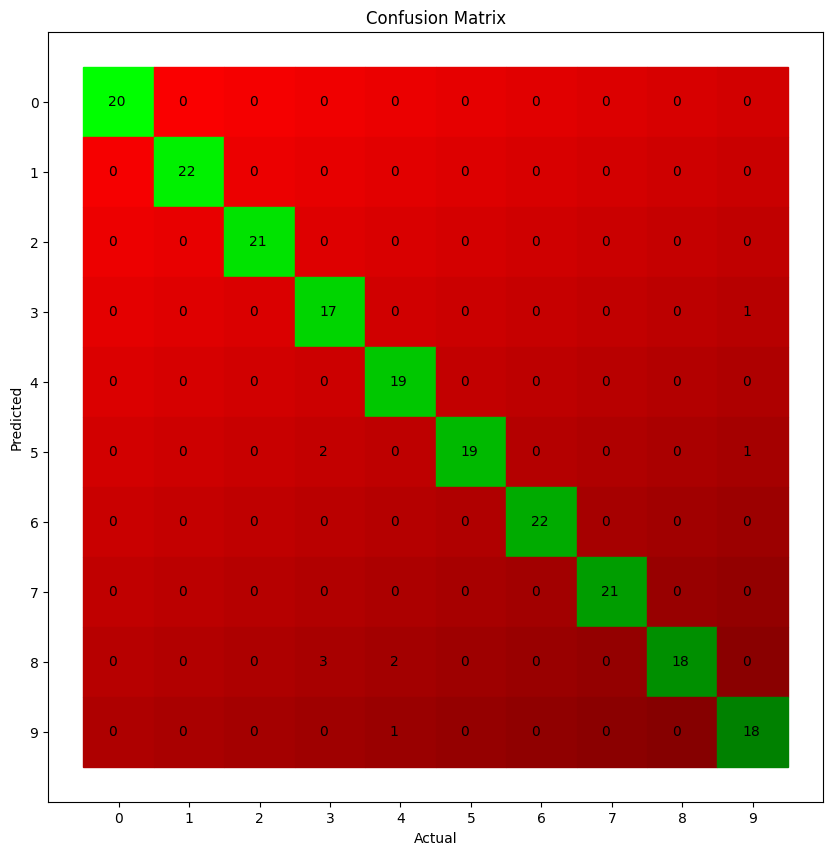

In [39]:
def confusion_plot(matrix):
    
    shape = np.shape(np.array(matrix))
    fig, ax = plt.subplots(1,figsize = (shape[0],shape[1]))
    ax.invert_yaxis()
    ax.set_xticks([i for i in range(shape[0])])
    ax.set_yticks([i for i in range(shape[0])])
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted")
    ax.set_title("Confusion Matrix")
    for i in range(shape[0]):
        for j in range(shape[1]):
            
            if i==j:
                colour_g = str(hex(255-(9*i+5*j)%255))[2:]
                colour_r = '00'
            if i!=j:
                colour_r = str(hex(255-(9*i+5*j)%255))[2:]
                colour_g = '00'
            if len(colour_g)==1:
                colour_g = '0'+colour_g
            if len(colour_r)==1:
                colour_r = '0'+colour_r
            colour = '#'+colour_r+colour_g+'00'

            ax.fill([-0.5+j,0.5+j,0.5+j,-0.5+j,-0.5+j],[-0.5+i,-0.5+i,0.5+i,0.5+i,-0.5+i],color = colour)
            ax.text(i-0.15,j+0.05,matrix[i][j],fontsize=10)
    plt.show()
confusion_plot(conf_mat.T)